# Basic Graph Properties

In [1]:
import networkx as nx
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Data Prep: Load political blog dataset

In [2]:
#Read edge list into Directed graph
pol_DiG=nx.read_edgelist("polblogs.edgelist.simple_format", 
                   nodetype=str,
                   data=(('weight',float),),
                   create_using=nx.DiGraph())

In [3]:
#Read edge list into Undirected graph
pol_G=nx.read_edgelist("polblogs.edgelist.simple_format", 
                   nodetype=str,
                   data=(('weight',float),),
                   create_using=nx.Graph())

## (1) Identify the isolated nodes in graph

In [55]:
# return a list of isolated nodes in graph G
def getIsolatedNodes(G):
    
    #get the list of nodes with degrees 
    nodelist = list(G.degree())
    
    # get the nodes that have a degree 0
    isolatedNodes = [node[0] for node in nodelist if node[1] == 0]
            
    return isolatedNodes

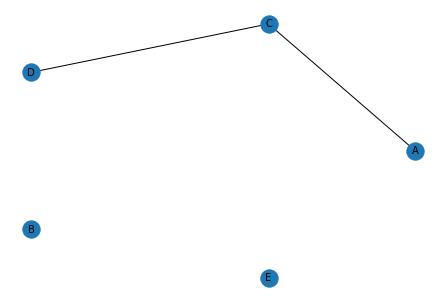

In [5]:
#test graph

G = nx.Graph()
G.add_edges_from([('A', 'C'), ('C', 'D')])
G.add_node('B')
G.add_node('E')

nx.draw_shell(G, with_labels=True, font_size=10)

In [57]:
# get list of isolated nodes of test graph

getIsolatedNodes(G)

['B', 'E']

In [58]:
# get list of isolated nodes in political blog DiGraph

getIsolatedNodes(pol_DiG)

[]

## (2) How many bi-directional edges does this graph have?

In [59]:
# return the number of bi-directional edges in a directional graph G

def countBiDirectionalEdges(G):
    bidirection = []
    
    #get the list of edges
    edgeList = list(G.edges)
    
    # for each edge (n1, n2), check if there edge with (n2, n1) in remaining edge list
    for i in range(0, len(edgeList)-1):
        edge1 = edgeList[i]
            
        for j in range(i, len(edgeList)):
            edge2 = edgeList[j]
            
            if (edge1[0] == edge2[1]) and (edge1[1] == edge2[0]):
                bidirection.append(edge1)
    
    return len(bidirection)

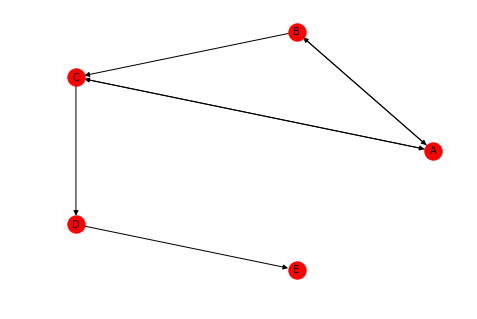

In [60]:
#test graph

G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('B', 'C'),('B', 'A'),('C','D'),('A','C'),('D', 'E'),('C','A')])

nx.draw_circular(G, with_labels=True, font_size=10)


In [61]:
# get the count bi-directional edges of test graph

countBiDirectionalEdges(G)

2

In [62]:
# get the count bi-directional edges of political blog DiGraph

countBiDirectionalEdges(pol_DiG)

3

## (3) Print the top 10 vertices in decreasing order of their out-degree

In [63]:
#print the top N vertices in decreasing order of out-degree in graph G
def printTopNVertices(G,N):
    
    # get the list of nodes with their out degree
    node_list = list(G.out_degree())
    
    #sort the nodes decending order of degree
    node_list.sort(key = lambda node : node[1], reverse=True)
    
    #print the top 10 nodes with the out_degree
    print(node_list[0:N])

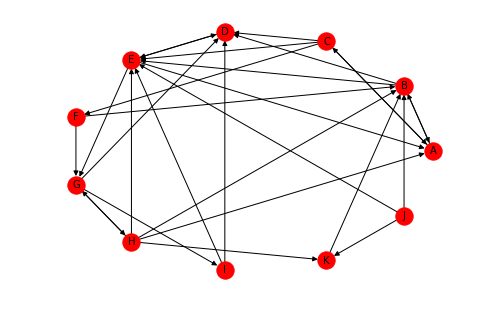

In [64]:
#test graph

G = nx.DiGraph()
G.add_edges_from([('A', 'B'),('A', 'C'),
                  ('B', 'A'),('B', 'D'),('B', 'E'),
                  ('C','D'),('C','E'),('C','A'),('C','F'),
                  ('D','E'),
                  ('E','E'),('E','A'),('E','G'),('E','D'),
                  ('F','B'),('F','G'),
                  ('G','D'),('G','H'),('G','I'),
                  ('H','E'),('H','B'),('H','G'),('H','A'),('H','K'),
                  ('I','E'),('I','D'),
                  ('J','B'),('J','K'),('J','E'),
                  ('K','B'),
                 ])

nx.draw_circular(G, with_labels=True, font_size=10)

In [65]:
# print the top ten vertices in the test graph

printTopNVertices(G,10)

[('H', 5), ('C', 4), ('E', 4), ('B', 3), ('G', 3), ('J', 3), ('A', 2), ('F', 2), ('I', 2), ('D', 1)]


In [66]:
# print the top ten vertices in the political blog DiGraph

printTopNVertices(pol_DiG,10)

[('lashawnbarber.com', 169), ('wizbangblog.com', 169), ('powerlineblog.com', 167), ('drudgereport.com', 160), ('washingtonmonthly.com', 159), ('newleftblogs.blogspot.com', 149), ('talkleft.com', 138), ('cayankee.blogs.com', 127), ('madkane.com/notable.html', 120), ('vodkapundit.com', 118)]


## (4) Compute density of the following subgraphs (assuming undirected and unweighted)

In [67]:
# return the density of undirected graph G
def GraphDensity(G):
    numEdges = len(G.edges())
    numNodes = len(G.nodes())
    Density = 2.0*numEdges / (numNodes * (numNodes - 1))
    return Density

### (a) u'rightrainbow.com', u'rosenblog.com', u'patrickruffini.com'

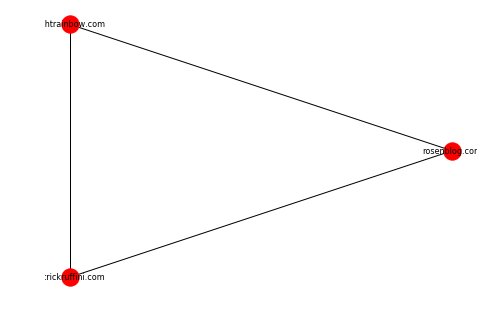

In [68]:
subG_A = pol_G.subgraph(['rightrainbow.com',
                     'rosenblog.com',
                     'patrickruffini.com'])
nx.draw_circular(subG_A, with_labels=True, font_size=8)

In [69]:
#Compute the graph density of subgraph A

GraphDensity(subG_A)

1.0

### (b) u'truebluegal.blogspot.com', u'lashawnbarber.com', u'dissectleft.blogspot.com', u'deanesmay.com', u'babytrollblog.com'

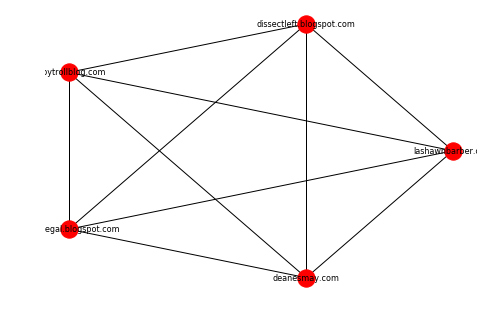

In [70]:
subG_B = pol_G.subgraph(['truebluegal.blogspot.com', 
                     'lashawnbarber.com',
                     'dissectleft.blogspot.com',
                     'deanesmay.com',
                     'babytrollblog.com'])
nx.draw_circular(subG_B, with_labels = True, font_size=8)

In [71]:
#Compute the graph density of subgraph B

GraphDensity(subG_B)

1.0

### (c) u'truebluegal.blogspot.com', u'lashawnbarber.com', u'deanesmay.com', u'babytrollblog.com', u'truebluegal.blogspot.com', u'dailyrecycler.com/blog', u'piano-tuning.net/blog'

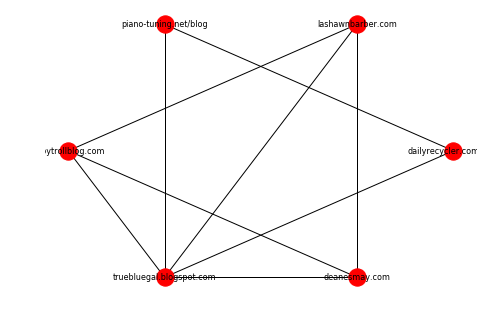

In [72]:
subG_C = pol_G.subgraph(['truebluegal.blogspot.com',
                     'lashawnbarber.com',
                     'deanesmay.com',
                     'babytrollblog.com',
                     'truebluegal.blogspot.com',
                     'dailyrecycler.com/blog',
                     'piano-tuning.net/blog'])
nx.draw_circular(subG_C, with_labels = True, font_size=8)

In [73]:
#Compute the graph density of subgraph C

GraphDensity(subG_C)

0.6

## (5) How many of the subgraphs given in the previous question are connected

### ANSWER: Connected graphs have a density of 1.  There are 2 subgraphs, (a) and (b), that are connected 